In [1]:
%config IPCompleter.greedy = True

# Plots y visualizacion de datos

In [27]:
import pandas as pd
import os
import numpy as np

In [4]:
os.getcwd()

'C:\\Users\\Usuario\\Documents\\GitHub\\python-ml-course\\NOTEBOOKS-CHRIS'

In [5]:
data = pd.read_csv(r"C:\Users\Usuario\Documents\GitHub\python-ml-course\datasets\customer-churn-model\Customer Churn Model.txt")

In [6]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [8]:
%matplotlib inline

In [9]:
#savefig("path_donde_guardar_imagen".formato_que_desees)

### Scatter Plot

<AxesSubplot:xlabel='Day Mins', ylabel='Day Charge'>

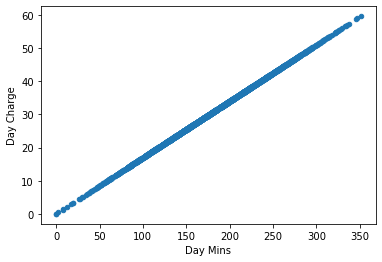

In [10]:
#Funcion pd.DataFrame.plot para ver la relacion entre las variables
data.plot(kind="scatter", x="Day Mins", y="Day Charge") 

<AxesSubplot:xlabel='Night Mins', ylabel='Night Charge'>

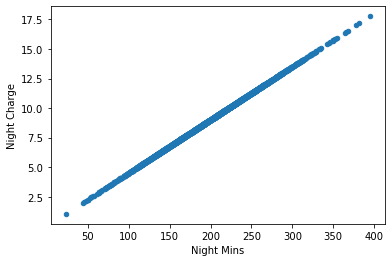

In [11]:
data.plot(kind="scatter", x="Night Mins", y="Night Charge")

In [12]:
# Graficos con Matplotlib
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Night Calls', ylabel='Night Charge'>

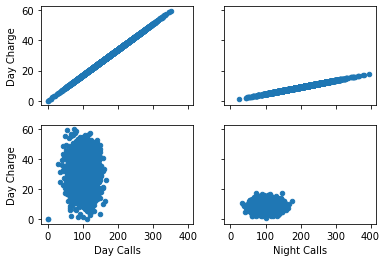

In [19]:
#Creando los espacios para las graficas
figure, axs = plt.subplots(2,2, sharey=True, sharex=True)
#Añadiendo las figuras 
data.plot(kind="scatter", x = "Day Mins", y = "Day Charge", ax=axs[0][0])
data.plot(kind="scatter", x = "Night Mins", y = "Night Charge", ax=axs[0][1])
data.plot(kind="scatter", x = "Day Calls", y = "Day Charge", ax=axs[1][0])
data.plot(kind="scatter", x = "Night Calls", y = "Night Charge", ax=axs[1][1])

### Histogramas de Frecuencia

Text(0.5, 1.0, 'Histograma de Numero de Llamadas al día')

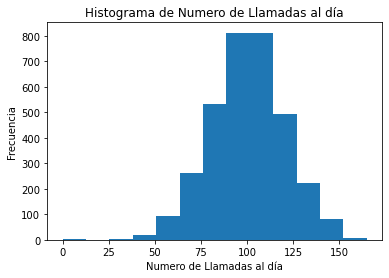

In [29]:
k = int(np.ceil(1 + np.log2(3333)))
plt.hist(data["Day Calls"], bins = k) #Usando el metodo de Sturges en el bins(numero de divisiones)
plt.xlabel("Numero de Llamadas al día")
plt.ylabel("Frecuencia")
plt.title("Histograma de Numero de Llamadas al día")

In [30]:
#Diferentes reglas para calcular las divisiones (bins) del histograma
import numpy as np
def sturges(data):
   # para numero datos mayores de 30
   num_data = len(data)
   num_bins = 1 + int(np.log2(num_data))
   print(num_bins)
   return num_bins

def freedman_diaconis(data):
   num_data = len(data)
   irq = np.percentile(data, 75) - np.percentile(data, 25)
   bin_width = 2 * irq / np.power(num_data, 1/3)
   num_bins = int((np.max(data) -  np.min(data)) / bin_width)  + 1
   print(num_bins)
   return num_bins

def scott(data):
   num_data = 1/(len(data))**(1/3)    
   num_bins = int(np.ceil(3.5*(np.std(data))*num_data))
   print(num_bins)
   return num_bins

def raiz(data):
   num_data = len(data)
   num_bins = int(np.ceil(np.sqrt(num_data)))    
   print(num_bins)
   return num_bins

### Diagrama de Caja y Bigotes, Boxplot

Text(0.5, 1.0, 'Boxplot de las llamadas diarias')

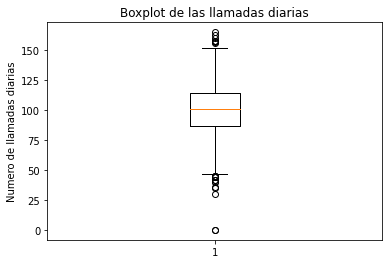

In [32]:
plt.boxplot(data["Day Calls"])
plt.ylabel("Numero de llamadas diarias")
plt.title("Boxplot de las llamadas diarias")

In [33]:
data["Day Calls"].describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: Day Calls, dtype: float64

In [35]:
#Rango Interquartilico IQR(Tamaño de la caja)
IQR = data["Day Calls"].quantile(0.75)-data["Day Calls"].quantile(0.25)
IQR

27.0

In [36]:
#Bigote Inferior
data["Day Calls"].quantile(0.25) - 1.5*IQR

46.5

In [37]:
#Bigote Superio
data["Day Calls"].quantile(0.75) + 1.5*IQR

154.5

In [38]:
#TODO LO QUE SUPERA EL BIGOTE SUPERIOR Y ESTE DEBAJO DEL BIGOTE INFERIOR
#SE LLAMAN OUTLIERS